<a href="https://colab.research.google.com/github/satwik-goyal/CR-CWK/blob/main/CR_CWK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Reshape , Multiply
from tensorflow.keras.layers import Input, DepthwiseConv2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.legacy import RMSprop
import matplotlib.pyplot as plt



In [3]:
 # Load CIFAR100 dataset
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

169001437/169001437 [==============================] - 2s 0us/step


In [4]:
print("Shape of the data " , X_train[0].shape)

Shape of the data  (32, 32, 3)


Sample input image: [[[0.98039216 0.98039216 0.972549  ]
  [0.972549   0.9764706  0.9529412 ]
  [0.96862745 0.972549   0.9372549 ]
  ...
  [0.98039216 0.98039216 0.9647059 ]
  [0.98039216 0.98039216 0.9647059 ]
  [0.9764706  0.98039216 0.9647059 ]]

 [[0.98039216 0.9843137  0.9607843 ]
  [0.972549   0.9764706  0.93333334]
  [0.96862745 0.96862745 0.91764706]
  ...
  [0.9843137  0.9843137  0.9490196 ]
  [0.9843137  0.9882353  0.9529412 ]
  [0.98039216 0.9843137  0.9529412 ]]

 [[0.9843137  0.9843137  0.95686275]
  [0.98039216 0.972549   0.92941177]
  [0.98039216 0.9607843  0.9137255 ]
  ...
  [0.98039216 0.9764706  0.93333334]
  [0.98039216 0.9764706  0.9411765 ]
  [0.98039216 0.9764706  0.9490196 ]]

 ...

 [[0.8666667  0.8352941  0.7490196 ]
  [0.8666667  0.80784315 0.6901961 ]
  [0.88235295 0.8117647  0.70980394]
  ...
  [0.78039217 0.6901961  0.5254902 ]
  [0.8117647  0.75686276 0.64705884]
  [0.9137255  0.8980392  0.8862745 ]]

 [[0.88235295 0.8745098  0.8       ]
  [0.8901961  0.8

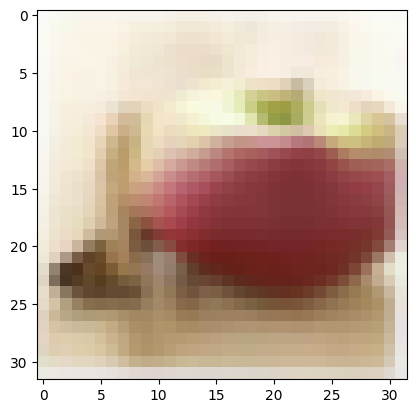

In [5]:
Selected_Image = 2
image = X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

In [7]:
def EfficientNet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Base Block
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)

    # Middle Block (Repeat this block multiple times)
    for _ in range(3):
        x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)

        # Squeeze and excitation
        se = GlobalAveragePooling2D()(x)
        se = Reshape((1, 1, int(x.shape[-1])))(se)
        se = Dense(int(x.shape[-1]) // 16, activation='relu')(se)
        se = Dense(int(x.shape[-1]), activation='sigmoid')(se)
        se = Reshape((1, 1, int(x.shape[-1])))(se)
        x = Multiply()([x, se])


        x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)

    # Top Block
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs, x)
    return model


In [8]:


# Create the model
model = EfficientNet(input_shape=(32, 32, 3), num_classes=100)

# Compile the model
opt = RMSprop(learning_rate=1e-2, decay=1e-6)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split = 0.1)

In [10]:
from tensorflow.keras.models import load_model
model.save("Model_lr-001.Efficientnet")

In [11]:
model_load_1 = load_model("Model_lr-001.Efficientnet")

In [12]:
history = model_load_1.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 3.3145 - accuracy: 0.3055


In [39]:
# import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# # Create a sequential model
# model_2 = tf.keras.Sequential()

# # Add convolutional layers
# model_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D((2, 2)))

# model_2.add(Conv2D(128, (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D((2, 2)))

# model_2.add(Conv2D(256, (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D((2, 2)))

# model_2.add(Conv2D(128, (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D((2, 2)))

# model_2.add(Conv2D(64, (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D((2, 2)))

# # Flatten the output
# model_2.add(Flatten())

# # Add fully connected layers
# model_2.add(Dense(512, activation='relu'))
# model_2.add(Dropout(0.5))  # Add dropout for regularization

# model_2.add(Dense(256, activation='relu'))
# model_2.add(Dropout(0.3))  # More dropout

# model_2.add(Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Multiply

# Create a sequential model
model_2 = tf.keras.Sequential()

# Add convolutional layers
model_2.add(SeparableConv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(SeparableConv2D(128, (3, 3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(SeparableConv2D(256, (3, 3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(SeparableConv2D(128, (3, 3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(SeparableConv2D(64, (3, 3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))

# Squeeze-and-Excitation Block
squeeze = GlobalAveragePooling2D()(model_2.output)
excitation = Dense(64 // 16, activation='relu')(squeeze)
excitation = Dense(64, activation='sigmoid')(excitation)
excitation = Multiply()([model_2.output, excitation])

# Flatten the output
model_2.add(Flatten())

# Add fully connected layers
model_2.add(Dense(512, activation='swish'))
model_2.add(Dropout(0.5))
model_2.add(Dense(256, activation='swish'))
model_2.add(Dropout(0.3))
model_2.add(Dense(100, activation='softmax'))
# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=50, batch_size=128, validation_split = 0.1)

Epoch 1/50
352/352 [==============================] - 89s 25ms/step - loss: 3.8084 - accuracy: 0.1123 - val_loss: 5.0874 - val_accuracy: 0.0090
Epoch 2/50
352/352 [==============================] - 7s 21ms/step - loss: 3.1748 - accuracy: 0.2123 - val_loss: 3.0675 - val_accuracy: 0.2416
Epoch 3/50
352/352 [==============================] - 7s 21ms/step - loss: 2.8723 - accuracy: 0.2698 - val_loss: 2.9470 - val_accuracy: 0.2564
Epoch 4/50
352/352 [==============================] - 7s 21ms/step - loss: 2.6812 - accuracy: 0.3073 - val_loss: 2.8662 - val_accuracy: 0.2830
Epoch 5/50
352/352 [==============================] - 7s 21ms/step - loss: 2.5255 - accuracy: 0.3391 - val_loss: 3.0663 - val_accuracy: 0.2778
Epoch 6/50
352/352 [==============================] - 7s 21ms/step - loss: 2.3924 - accuracy: 0.3714 - val_loss: 2.6352 - val_accuracy: 0.3278
Epoch 7/50
352/352 [==============================] - 7s 21ms/step - loss: 2.2856 - accuracy: 0.3895 - val_loss: 2.6976 - val_accuracy: 0.309

In [40]:
history = model_2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 3.7646 - accuracy: 0.3361


In [41]:
history

[3.7646195888519287, 0.3361000120639801]

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Multiply
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create a sequential model
model_2 = tf.keras.Sequential()

# Add convolutional layers
model_2.add(SeparableConv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.2))

model_2.add(SeparableConv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.3))

model_2.add(SeparableConv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_2.add(BatchNormalization())
model_2.add(Activation('swish'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.4))

# Squeeze-and-Excitation Block
squeeze = GlobalAveragePooling2D()(model_2.output)
excitation = Dense(256 // 16, activation='swish')(squeeze)
excitation = Dense(256, activation='sigmoid')(excitation)
excitation = Multiply()([model_2.output, excitation])

# Flatten the output
model_2.add(Flatten())

# Add fully connected layers
model_2.add(Dense(512, activation='swish', kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.5))
model_2.add(Dense(256, activation='swish', kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(100, activation='softmax'))

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
model_2.fit(train_datagen.flow(X_train, y_train, batch_size=64),
            steps_per_epoch=len(X_train) // 64,
            epochs=100,
            validation_data=val_datagen.flow(X_test, y_test, batch_size=64),
            validation_steps=len(X_test) // 64,)

NameError: name 'X_train' is not defined